# Text Preprocessing Methods

The line `!pip install nltk` is used to install the **Natural Language Toolkit (NLTK)**, a popular Python library for natural language processing (NLP).

* The `!` at the beginning is specific to environments like Jupyter Notebooks, where it allows shell commands to be run directly from a code cell.
* `pip install nltk` tells Python’s package manager (`pip`) to download and install the NLTK library and its dependencies.

Once installed, you can use NLTK for tasks like tokenization, stemming, sentiment analysis, and working with corpora or linguistic datasets.

In [1]:
! pip install nltk

This code block sets up the tools needed for basic text processing and analysis. It imports the NLTK library for natural language processing, Python's built-in `string` module for handling punctuation, and `matplotlib.pyplot` for creating visualizations. It also downloads two essential NLTK resources: `punkt_tab` for advanced word tokenization and `stopwords` for filtering out common words that usually don't carry meaningful information. Finally, it imports `word_tokenize` to split text into individual words and `FreqDist` to calculate the frequency of those words for further analysis or visualization.

In [2]:
import nltk
import string
import matplotlib.pyplot as plt

nltk.download("punkt_tab")
nltk.download("stopwords")

from nltk import word_tokenize
from nltk.probability import FreqDist

       

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mearacox/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mearacox/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Using `.lower()` to make text uniform
This code is using `.lower()` to convert all characters in the text to lowercase, which is a common step in text preprocessing to ensure consistency (so that words like "This" and "this" are treated the same). Similarly, the `.upper()` method converts all characters to uppercase. Finally, `print(text)` outputs the lowercase version of the text.


In [3]:
#sample text
text = "This is my test text. We're keeping this text short to keep things manageable."
text = text.lower() 
print(text)

this is my test text. we're keeping this text short to keep things manageable.


This code defines a function `read_book(title)` that reads the full contents of a text file and returns it as a single cleaned-up string.

Inside the function, the `with open(...)` statement opens the file specified by `title` in read mode with UTF-8 encoding, ensuring it can handle most characters properly. The `read()` method loads the entire file content into the variable `text`. The line `text.replace("\n", "").replace("\r", "")` removes newline and carriage return characters, flattening the text into a continuous string.

After defining the function, the line `text = read_book("RomeoAndJuliet.txt")` calls it to load the contents of *Romeo and Juliet*. The following line, `text = text.lower()`, converts the entire text to lowercase. Finally, `print(text)` displays the cleaned, lowercase version of the text.


In [4]:
#Reading text from a file in python
def read_book(title):  #read a book and return it as a string 
    with open(title, "r", encoding ="utf8") as current_file: 
        text = current_file.read() 
        text = text.replace("\n", "").replace("\r", "") 
    return text 

In [5]:
text = read_book("RomeoAndJuliet.txt")
text = text.lower()

In [6]:
print(text)

the project gutenberg ebook of romeo and juliet, by william shakespearethis ebook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever.  you may copy it, give it away orre-use it under the terms of the project gutenberg license includedwith this ebook or online at www.gutenberg.org/licensetitle: romeo and julietauthor: william shakespeareposting date: may 25, 2012 [ebook #1112]release date: november, 1997  [etext #1112]language: english*** start of this project gutenberg ebook romeo and juliet ****project gutenberg is proud to cooperate with the world library*in the presentation of the complete works of william shakespearefor your reading for education and entertainment.  however, thisis neither shareware nor public domain. . .and under the libraryof the future conditions of this presentation. . .no charges maybe made for *any* access to this material.  you are encouraged!!to give it away to anyone you like, but no charges are allowed!!the complete wor

## Using `.replace()` to remove punctuation
This code removes all punctuation marks from the text by replacing them with spaces.

It loops through each character in `string.punctuation`, which contains common punctuation symbols (like `.`, `!`, `?`, `,`, etc.). For every punctuation mark found, `text.replace(x, " ")` replaces it, `x`,  with a space, helping to separate words cleanly without merging them accidentally. After the loop finishes, the text is free of punctuation. The `print()` statements then display a message and the cleaned version of the text, making it ready for further processing like tokenization or frequency analysis.


In [7]:
# traverse the given string and if any punctuation marks occur replace it with null 
for x in string.punctuation: 
  text = text.replace(x, " ") 
# Print string without punctuation 
print("\n AFTER REMOVING PUNCTUATIONS:\n")
print(text)



 AFTER REMOVING PUNCTUATIONS:

﻿the project gutenberg ebook of romeo and juliet  by william shakespearethis ebook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever   you may copy it  give it away orre use it under the terms of the project gutenberg license includedwith this ebook or online at www gutenberg org licensetitle  romeo and julietauthor  william shakespeareposting date  may 25  2012  ebook  1112 release date  november  1997   etext  1112 language  english    start of this project gutenberg ebook romeo and juliet     project gutenberg is proud to cooperate with the world library in the presentation of the complete works of william shakespearefor your reading for education and entertainment   however  thisis neither shareware nor public domain     and under the libraryof the future conditions of this presentation     no charges maybe made for  any  access to this material   you are encouraged  to give it away to anyone you like  but no char

## Using `len()`
We can use `print(len(text))` to print the **number of characters** in the string `text `, including letters, spaces, and any remaining symbols.
For example, if `text = "hello world"`, `len(text)` returns `11` (5 letters + 1 space + 5 letters).
This is useful for checking the length of the entire string, but it doesn’t tell you how many words there are.

We can also use `print(len(text.split()))` to print the **number of words** in the string `text`. `text.split()` breaks the string into a list of words using whitespace (spaces, tabs, line breaks) as the default separator.
For example, if `text = "hello world"`, then `text.split()` returns `["hello", "world"]`, and `len(text.split())` returns `2`.
This is commonly used in text analysis to count how many words are in a document or sentence.

In [8]:

# Count the number of characters after removing punctuations
print(len(text))

# Count the number of words after removing punctuations
print(len(text.split()))

169275
29806


## Tokenizing
This line of code breaks the input text into individual tokens, which are typically words and punctuation marks. First, the text is converted to lowercase using `text.lower()` to ensure consistency in analysis. Then, the `word_tokenize()` function from NLTK is used to intelligently split the text into a list of tokens, accounting for punctuation, contractions, and special characters. The resulting tokens are stored in the variable `token`, making them ready for further processing such as frequency analysis or filtering.

In [9]:
# BREAK THE STRING INTO TOKENS
token = word_tokenize(text.lower())

## Using `stopwords` to remove stop words
This code removes common stopwords from the list of tokens in the text. It first imports the list of English stopwords from the NLTK corpus and stores them as a set `a` for faster lookup. Then, it uses a list comprehension to create a new list `no_stopwords` containing only the tokens that are **not** in the stopwords set. Finally, it prints the cleaned list of tokens, which now excludes common words like "the", "is", and "and"—helping to focus analysis on more meaningful content.

In [10]:
from nltk.corpus import stopwords
a = set(stopwords.words("english"))

#print(" The token form of the text is:\n", token)
no_stopwords = [x for x in token if x not in a] # for each x in text1, if x is not in a then, add it to the list" 
print("After removing the stop words:\n", no_stopwords)


After removing the stop words:
 ['\ufeffthe', 'project', 'gutenberg', 'ebook', 'romeo', 'juliet', 'william', 'shakespearethis', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'withalmost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'orre', 'use', 'terms', 'project', 'gutenberg', 'license', 'includedwith', 'ebook', 'online', 'www', 'gutenberg', 'org', 'licensetitle', 'romeo', 'julietauthor', 'william', 'shakespeareposting', 'date', 'may', '25', '2012', 'ebook', '1112', 'release', 'date', 'november', '1997', 'etext', '1112', 'language', 'english', 'start', 'project', 'gutenberg', 'ebook', 'romeo', 'juliet', 'project', 'gutenberg', 'proud', 'cooperate', 'world', 'library', 'presentation', 'complete', 'works', 'william', 'shakespearefor', 'reading', 'education', 'entertainment', 'however', 'thisis', 'neither', 'shareware', 'public', 'domain', 'libraryof', 'future', 'conditions', 'presentation', 'charges', 'maybe', 'made', 'access', 'material', 'encouraged', 'give', 'away',

The line `len(no_stopwords)` returns the **number of tokens remaining after stopwords have been removed** from the original text.

This is useful for understanding how much of the text consists of meaningful or content-rich words (i.e., words that aren't basic connectors like *"and"*, *"the"*, or *"is"*). The result gives you a clearer sense of the size of your cleaned, analysis-ready dataset.

In [11]:
len(no_stopwords)

16149

## Using `FreqDist` to Get Frequencies
This code calculates and displays the frequency of the most common words in the cleaned text. First, it creates a `FreqDist` object from the `no_stopwords` list, which counts how often each token appears. Then, `fdist.most_common(5)` returns the top 5 most frequent words along with their counts, and this result is stored in `fdist1`. After printing the top words, the code separates this list of word-frequency pairs into two separate lists: `x` holds the words and `y` holds their corresponding frequencies. This separation is useful for plotting or further analysis.


In [12]:
# find the frequency of tokens
fdist = FreqDist(no_stopwords) 

# Find the top 5 words by frequency
print("TOP 5 WORDS")
fdist1 = fdist.most_common(5)
print(fdist1)

# segregate the above list in 2 lists, words and its frequency
x,y = [[ i for i, j in fdist1 ], 
       [ j for i, j in fdist1 ]]
print(x)
print(y)

TOP 5 WORDS
[('thou', 278), ('thy', 164), ('rom', 163), ('romeo', 162), ('love', 151)]
['thou', 'thy', 'rom', 'romeo', 'love']
[278, 164, 163, 162, 151]


The line `plt.bar(x, y)` creates a **bar chart** using the two lists:

* `x` contains the **words** (labels for the x-axis), and
* `y` contains the **frequencies** (heights of the bars on the y-axis).

This visualizes the top 5 most common words (after removing stopwords) and shows how frequently each one appears in the text. It's a helpful way to quickly identify which meaningful words are most prominent.


<BarContainer object of 5 artists>

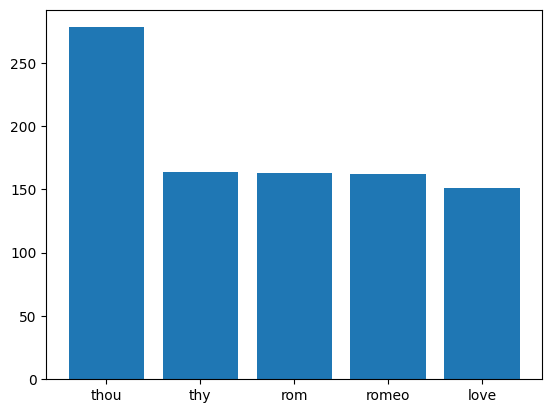

In [13]:
plt.bar(x,y)
 

## Total Unique words
* Design function called word_stats(), which will take the word frequency dictionary( output of count_words_fast():count_words() ) as a parameter.
* The function will return the total no of unique words and a dict_values holding total count of them together, as a tuple.

This code calculates the frequency of all tokens in the text, including common stopwords and punctuation (if not previously removed).

First, it uses `FreqDist(token)` to create a frequency distribution object that counts how many times each token appears. Then, `fdist.most_common(5)` retrieves the top 5 most frequent tokens along with their counts, and prints them. Next, it separates this list of (word, frequency) pairs into two separate lists: `x` contains the top 10 words, and `y` contains their corresponding frequencies. These lists can then be used to plot a bar graph or perform other forms of analysis.

In [18]:
# find the frequency of tokens
fdist = FreqDist(token) 

# Find the top 10 words by frequency
print("TOP 5 WORDS")
fdist1 = fdist.most_common(5)
print(fdist1)

# segregate the above list in 2 lists, words and its frequency
x,y = [[ i for i, j in fdist1 ], 
       [ j for i, j in fdist1 ]]
print(x)
print(y)

TOP 5 WORDS
[('the', 844), ('and', 791), ('i', 658), ('to', 652), ('of', 527)]
['the', 'and', 'i', 'to', 'of']
[844, 791, 658, 652, 527]


We can use `plt.bar(x, y)` to draw the bars, where `x` contains the words and `y` their corresponding frequencies. Then, the plot is labeled with `xlabel`, `ylabel`, and `title` to give it context. Instead of just displaying the graph on the screen, `plt.savefig("plot.png")` saves the figure as an image file named **plot.png** in the current directory. This is useful if you want to include the graph in a report or presentation.


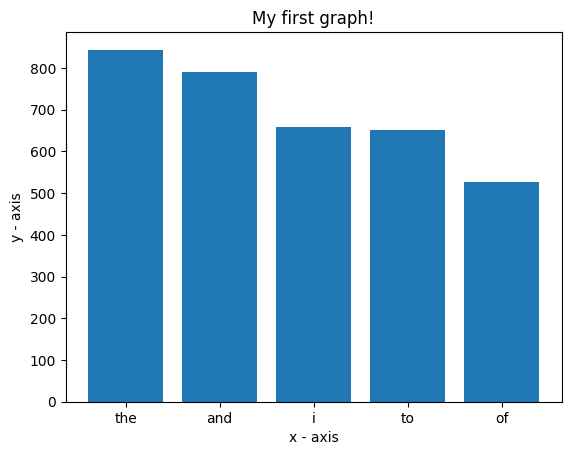

In [19]:
# plotting the points  
plt.bar(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('My first graph!') 
  
# function to show the plot 
plt.savefig("plot.png")

The command `! pip install wordcloud` is used in environments like Jupyter Notebook to install the **`wordcloud`** library.

This library allows you to generate **word clouds**, which are visual representations of text data where more frequent words appear larger and bolder. The exclamation mark `!` at the beginning tells the notebook to run the command as a shell command, just like you would in a terminal. After installation, you can use the library to easily create word clouds from token lists, frequency distributions, or raw text.

In [16]:
! pip install wordcloud

This code generates and displays a **word cloud** from the list of meaningful tokens stored in `no_stopwords`.

It starts by importing `WordCloud` and other useful tools from the `wordcloud` library. A figure is created using `plt.figure()` with a size of 12x12 inches. The word cloud is then generated with specified dimensions (`width=1800`, `height=1400`) by converting the list of tokens (`no_stopwords`) into a single string using `str(no_stopwords)`. The `plt.imshow()` function displays the word cloud image, and `plt.axis("off")` removes the axis for a cleaner look. Finally, `plt.show()` renders the visual, where the size of each word reflects its frequency in the text.


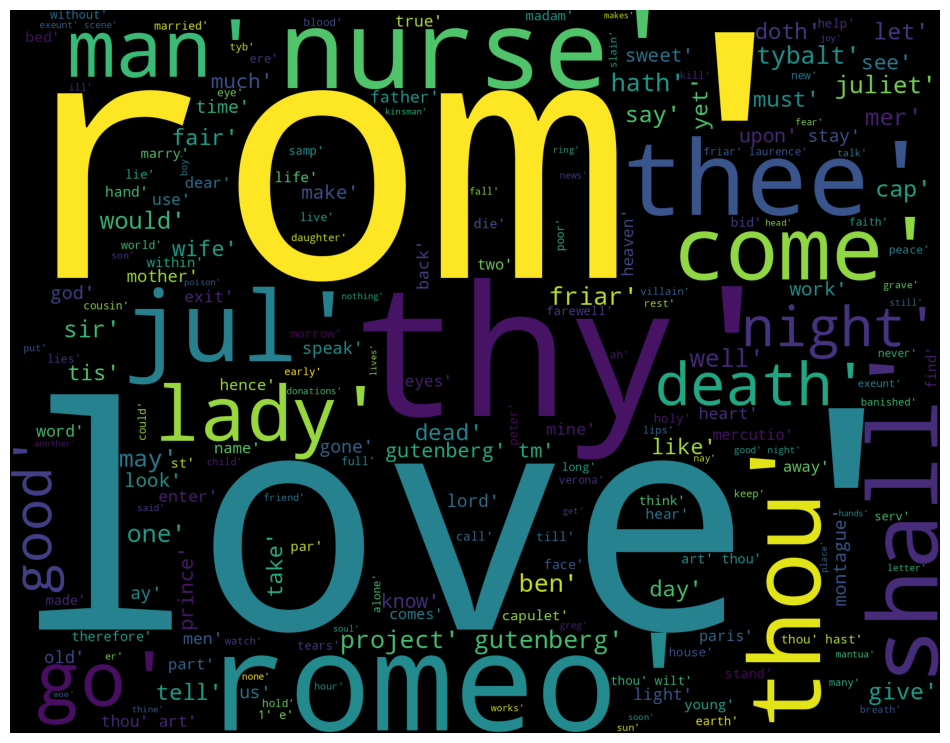

In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

width = 12
height = 12
plt.figure(figsize=(width, height))
#text = 'all your base are belong to us all of your base base base'
wordcloud = WordCloud(width=1800,height=1400).generate(str(no_stopwords))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()